In [1]:
import sys
sys.path.append('../../functions')


import matplotlib.pyplot as plt
import glob
from output_funcs import openFile
from output_funcs import ODea, NC, NCM2
from output_funcs import PrevalenceTheoryM1,PrevalenceTheoryM2, PrevalenceTheoryM3
from plots_funcs import IncPrev_figures, RoI_figures
from stats_funcs import Skew_theory, Skew_simulations
from output_funcs import RoI_fluctuationsM1M3, RoI_fluctuationsM2

# Parameter Values

In [2]:
param_all = {'repeats': 500,
            'T': 500, 
            'BT': 300,
            'p': 1/500,
            'ST': 0}

In [3]:
parametersEm = {'beta0': 0.12, 
               'gamma':0.2,
                'I0': [0,0,0], 
               'nu': 0.001,
               'mu': 0,
               'p_0': 0,
               'psign': 1,
               'BW': 30,
               'N':100000}
parametersExt = {'beta0': 1, 
               'gamma':0.2,
                'I0': [0.8,0,0], 
               'nu': 0,
               'mu': 0,
               'p_0': 0,
               'psign': -1,
                'BW': 30,
                'N': 10000}
parametersVacc = {'beta0': 1, 
               'gamma':0.18,
                'I0':  [0.2, 0.8, 0,0,0], 
               'nu': 0,
               'mu': 0.02,
               'p_0': 0,
               'psign': 0,
                 'BW':30,
                 'N':10000}

# Files

In [4]:
files = glob.glob('../data/dataHPC/*')

In [5]:
emFiles = [file for file in files if 'emergence' in file]
extFiles = [file for file in files if '500' in file]
vaccFiles = [file for file in files if 'vacc' in file]


# Results

In [6]:
EmResults = openFile(filePath = [file for file in emFiles if 'Em_' in file][0], 
                      realisations = param_all['repeats'],
                     T=param_all['T'],BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersEm['beta0'],
                     gamma=parametersEm['gamma'],
                     nu=parametersEm['nu'],
                     mu=parametersEm['mu'],
                     p0=parametersEm['p_0'],
                     p = param_all['p'],
                     Initial=parametersEm['I0'],
                     sign =parametersEm['psign'],
                     TYPE='Ext',
                     functionPrev=PrevalenceTheoryM3,
                     functionInc=NC,
                     functionOdea= ODea)
FixEmResults = openFile(filePath = [file for file in emFiles if 'Fix' in file][0], 
                      realisations = param_all['repeats'],
                     T=param_all['T'],BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersEm['beta0'],
                     gamma=parametersEm['gamma'],
                     nu=parametersEm['nu'],
                     mu=parametersEm['mu'],
                     p0=parametersEm['p_0'],
                     p = param_all['p'],
                     Initial=parametersEm['I0'],
                     sign =parametersEm['psign'],
                     TYPE='Fix',
                     functionPrev=PrevalenceTheoryM3,
                     functionInc=NC,
                     functionOdea= ODea)

In [7]:
ExtResults = openFile(filePath = [file for file in extFiles if 'Ext' in file][0], 
                      realisations = param_all['repeats'],
                     T=param_all['T'],BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersExt['beta0'],
                     gamma=parametersExt['gamma'],
                     nu=parametersExt['nu'],
                     mu=parametersExt['mu'],
                     p0=parametersExt['p_0'],
                     p = param_all['p'],
                     Initial=parametersExt['I0'],
                     sign =parametersExt['psign'],
                     TYPE='Ext',
                     functionPrev=PrevalenceTheoryM1,
                     functionInc=NC)
FixResults = openFile(filePath = [file for file in extFiles if 'Fix' in file][0], 
                      realisations = param_all['repeats'],
                     T=param_all['T'],BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersExt['beta0'],
                     gamma=parametersExt['gamma'],
                     nu=parametersExt['nu'],
                     mu=parametersExt['mu'],
                     p0=parametersExt['p_0'],
                     p = param_all['p'],
                     Initial=parametersExt['I0'],
                     sign =parametersExt['psign'],
                     TYPE='Fix',
                     functionPrev=PrevalenceTheoryM1,
                     functionInc=NC)

In [8]:
VaccResults = openFile(filePath = [file for file in vaccFiles if 'Ext' in file][0], 
                      realisations = param_all['repeats'],
                     T=param_all['T'],BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersVacc['beta0'],
                     gamma=parametersVacc['gamma'],
                     nu=parametersVacc['nu'],
                     mu=parametersVacc['mu'],
                     p0=parametersVacc['p_0'],
                     p = param_all['p'],
                     Initial=parametersVacc['I0'],
                     sign =parametersVacc['psign'],
                     TYPE='Ext',
                     functionPrev=PrevalenceTheoryM2,
                     functionInc=NCM2)
FixVaccResults = openFile(filePath = [file for file in vaccFiles if 'Fix' in file][0], 
                      realisations = param_all['repeats'],
                     T=param_all['T'],BT= param_all['BT'],
                     ST= param_all['ST'],
                      beta0=parametersVacc['beta0'],
                     gamma=parametersVacc['gamma'],
                     nu=parametersVacc['nu'],
                     mu=parametersVacc['mu'],
                     p0=parametersVacc['p_0'],
                     p = param_all['p'],
                     Initial=parametersVacc['I0'],
                     sign =parametersVacc['psign'],
                     TYPE='Fix',
                     functionPrev=PrevalenceTheoryM2,
                     functionInc=NCM2)

# Plots

In [9]:
stat = 'Supp_skew'
extension = '.pdf'
ylabel = 'Skewness'

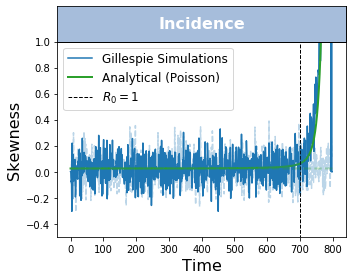

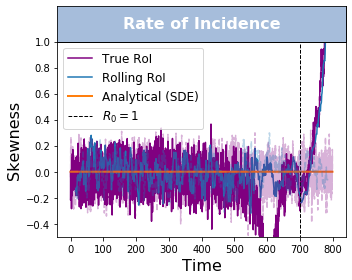

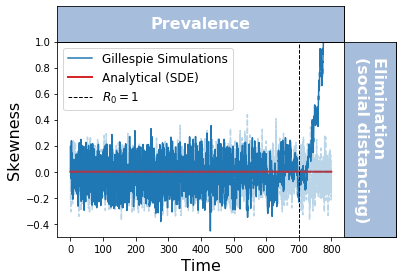

In [10]:
r0_1_t = (parametersExt['psign']*parametersExt['gamma']/parametersExt['beta0']+1)/param_all['p'] + param_all['BT']
ymin = -0.5
ylim = 1
for data in ['Incidence','RoI', 'Prevalence']:
    if data == 'Incidence':

        figwidth = 5
        plotting_func = IncPrev_figures
    elif data=='RoI':
#         ylim=0.2
        figwidth = 5
        plotting_func = RoI_figures
    elif data == 'Prevalence':
#         ylim = 0.2
        figwidth = 5.7
        plotting_func = IncPrev_figures
    

    fig, ax = plt.subplots(1, figsize = (figwidth,4))
   
    plotting_func(results_dict=ExtResults,
                param_dict=parametersExt,
                model_no=1,
                data_type=data,
                statistical_func_simulation=Skew_simulations,
                statistical_func_theory=Skew_theory,
                ax=ax,
                param_all=param_all,
                r0_1_t=r0_1_t, 
                RUN='Ext',
                  theory_func=RoI_fluctuationsM1M3,
#                text_col='#252525',
                text_col='white',
               border_col='#a6bddb')
    ax.legend(loc = 'upper left', ncol =1, fontsize = 12)

    plotting_func(results_dict=FixResults,
                param_dict=parametersExt,
                model_no=1,
                data_type=data,
                statistical_func_simulation=Skew_simulations,
                statistical_func_theory=Skew_theory,
                ax=ax,
                param_all=param_all,
                r0_1_t=r0_1_t, 
                RUN='Fix',
                  theory_func=RoI_fluctuationsM1M3,
#                text_col='#252525',
                text_col='white',
                border_col='#a6bddb', 
                alpha = 0.3,
                   linestyle='--')
    ax.set_ylim([ymin,ylim])
    ax.set_ylabel(ylabel, fontsize = 16)
    ax.set_xlabel('Time', fontsize=16)
    fig.tight_layout()
    fig.savefig('../figures/'+extension[1:]+'/'+stat+data+'_M1'+extension)

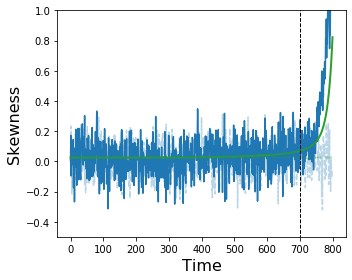

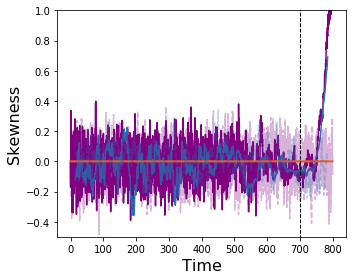

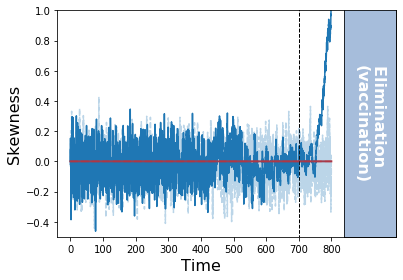

In [11]:

for data in ['Incidence','RoI', 'Prevalence']:
    if data == 'Incidence':
#         ylim = 0.2
        figwidth = 5
        plotting_func = IncPrev_figures
    elif data=='RoI':
#         ylim=0.2
        figwidth = 5
        plotting_func = RoI_figures
    elif data == 'Prevalence':
#         ylim = 0.2
        figwidth = 5.7
        plotting_func = IncPrev_figures
    

    fig, ax = plt.subplots(1, figsize = (figwidth,4))
    plotting_func(results_dict=VaccResults,
                param_dict=parametersVacc,
                model_no=2,
                data_type=data,
                statistical_func_simulation=Skew_simulations,
                statistical_func_theory=Skew_theory,
                ax=ax,
                  RUN='Ext',
                  theory_func=RoI_fluctuationsM2,
                param_all=param_all, 
                text_col='white',
               border_col='#a6bddb')
   
    plotting_func(results_dict=FixVaccResults,
                param_dict=parametersVacc,
                model_no=2,
                data_type=data,
                statistical_func_simulation=Skew_simulations,
                statistical_func_theory=Skew_theory,
                ax=ax,
                  RUN='Fix',
                  theory_func=RoI_fluctuationsM2,
                param_all=param_all, 
                text_col='white',
               border_col='#a6bddb', 
                alpha = 0.3,
                   linestyle='--')
    ax.set_ylim([ymin,ylim])
#     ax.legend(loc = 'upper left', ncol =1, fontsize = 12)
    ax.set_ylabel(ylabel, fontsize = 16)
    ax.set_xlabel('Time', fontsize=16)
    fig.tight_layout()
    fig.savefig('../figures/'+extension[1:]+'/'+stat+data+'_M2'+extension)

/home/emma/Documents/PHD_work/2nd_year/RateofIncidence/python_files/stats_funcs.py:311: RuntimeWarning: divide by zero encountered in true_divide
  theory = 1/np.sqrt(results_dict['I_theory'][:,0]*param_dict['N'])
/home/emma/Documents/PHD_work/2nd_year/RateofIncidence/python_files/stats_funcs.py:311: RuntimeWarning: divide by zero encountered in true_divide
  theory = 1/np.sqrt(results_dict['I_theory'][:,0]*param_dict['N'])


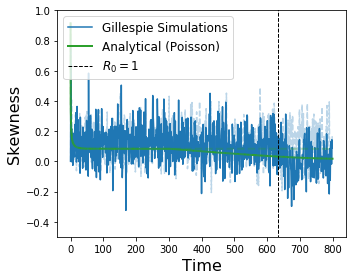

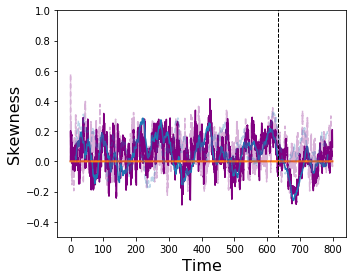

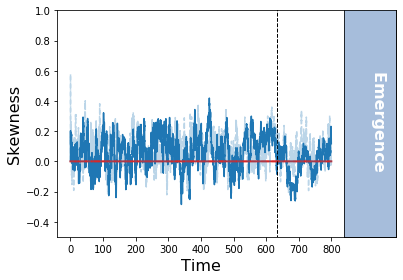

In [12]:
r0_1_t = (parametersEm['gamma']/parametersEm['beta0']-1)/param_all['p'] + param_all['BT']

for data in ['Incidence','RoI', 'Prevalence']:
    odea = False
    if data == 'Incidence':
#         ylim = 0.2
        figwidth = 5
        plotting_func = IncPrev_figures
#         odea = True
    elif data=='RoI':
#         ylim=0.2
        figwidth = 5
        plotting_func = RoI_figures
    elif data == 'Prevalence':
#         ylim = 0.2
        figwidth = 5.7
        plotting_func = IncPrev_figures

    fig, ax = plt.subplots(1, figsize = (figwidth,4))
    plotting_func(results_dict=EmResults,
            param_dict=parametersEm,
            model_no=3,
            data_type= data,
            RUN= 'Ext',
                  theory_func=RoI_fluctuationsM1M3,
                statistical_func_simulation=Skew_simulations,
                statistical_func_theory=Skew_theory,
            ax=ax,
            param_all=param_all,
            r0_1_t=r0_1_t, 
                text_col='white',
               border_col='#a6bddb',
            odea_theory=odea)
    if data == 'Incidence':
        ax.legend(loc = 'upper left', ncol =1, fontsize = 12)
    plotting_func(results_dict=FixEmResults,
            param_dict=parametersEm,
            model_no=3,
            data_type= data,
            RUN = 'Fix',
                  theory_func=RoI_fluctuationsM1M3,
                statistical_func_simulation=Skew_simulations,
                statistical_func_theory=Skew_theory,
            ax=ax,
            param_all=param_all,
            r0_1_t=r0_1_t, 
                text_col='white',
               border_col='#a6bddb', 
                alpha = 0.3,
                   linestyle='--',
            odea_theory=odea)
    ax.set_ylim([ymin,ylim])
    
    
    ax.set_ylabel(ylabel, fontsize = 16)
    ax.set_xlabel('Time', fontsize=16)
    fig.tight_layout()
    fig.savefig('../figures/'+extension[1:]+'/'+stat+data+'_M3'+extension)